## Introduction

In this jupyter notebook, I combined a few thing I did in the past meetings. I have tested out the random noise again with one single image. Then, I implemented adversarial example by first creating a perturbation. My perturbation is based on tensorflow and it uses a cross_entropy loss function to find the gradient. Then, find the sign of the gradient. With a number of eplison, I modified the original image by the perturbation times the eplison. According to a research paper "EXPLAINING AND HARNESSING ADVERSARIAL EXAMPLES," a eplison of 0.25 should do the work. I tested it out on one image of 2 and one image of 7. Appearently, the 2's image was more influenced by perturbation.

## Code

In [259]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [260]:
tf.__version__

'2.8.0'

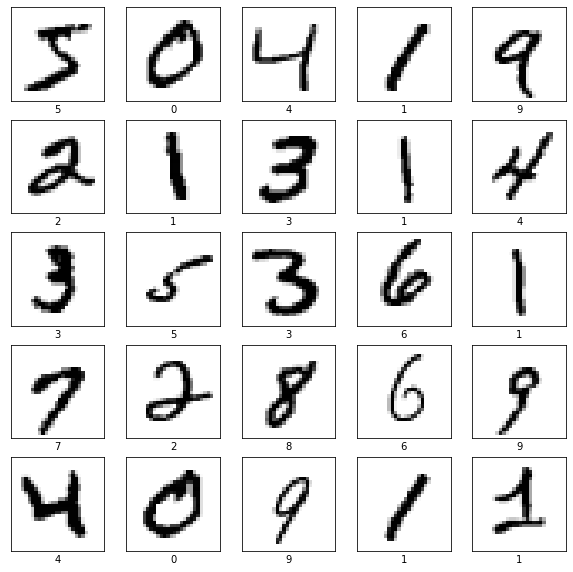

In [261]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [262]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

In [263]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

Text(0.5, 1.0, 'Ground Truth : 7')

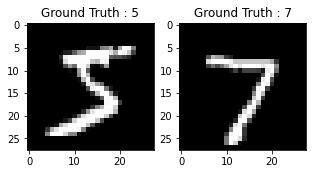

In [264]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [265]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [266]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.
test_images = test_images / 255.

## One hot encoded vector

In [267]:
from tensorflow.keras.utils import to_categorical
# Change the labels from categorical to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Display the change for category label using one-hot encoding
print('Original label:', train_labels[0])
print('After conversion to one-hot:', train_labels_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [268]:
train_labels_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [269]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_images, train_labels_one_hot, test_size=0.1, random_state=13)

In [270]:
train_X.shape

(54000, 28, 28, 1)

## CNN Model

In [271]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [272]:
batch_size = 64
epochs = 10
num_classes = 10

In [273]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='linear'))
mnist_model.add(Dense(num_classes, activation='softmax'))

In [274]:
mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [275]:
mnist_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 3136)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [276]:
mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/10
844/844 [==============================] - 25s 29ms/step - loss: 0.4844 - accuracy: 0.8480 - val_loss: 0.2015 - val_accuracy: 0.9420
Epoch 2/10
844/844 [==============================] - 29s 34ms/step - loss: 0.1453 - accuracy: 0.9574 - val_loss: 0.1223 - val_accuracy: 0.9623
Epoch 3/10
844/844 [==============================] - 27s 32ms/step - loss: 0.0975 - accuracy: 0.9709 - val_loss: 0.0776 - val_accuracy: 0.9760
Epoch 4/10
844/844 [==============================] - 29s 35ms/step - loss: 0.0757 - accuracy: 0.9764 - val_loss: 0.0654 - val_accuracy: 0.9808
Epoch 5/10
844/844 [==============================] - 27s 32ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0709 - val_accuracy: 0.9778
Epoch 6/10
844/844 [==============================] - 26s 31ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0644 - val_accuracy: 0.9802
Epoch 7/10
844/844 [==============================] - 27s 32ms/step - loss: 0.0532 - accuracy: 0.9837 - val_loss: 0.0596 - val_accuracy:

In [277]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)

In [278]:
test_eval = mnist_model.evaluate(test_images, test_labels_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.05058183893561363
Test accuracy: 0.9829999804496765


## get class label methods

In [288]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
class_names[train_labels[20]]

'4'

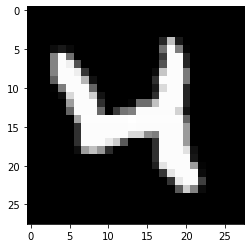

In [290]:
plt.imshow(train_images[20],cmap='gray')

9


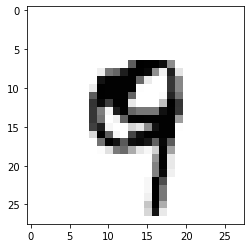

In [258]:
image_index = 4444
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = mnist_model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

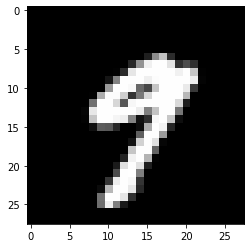

In [289]:
plt.imshow(test_images[20],cmap='gray')

In [323]:
img1 = test_images[1]
img1 = (np.expand_dims(img1,0))
img1.shape
img1 = tf.convert_to_tensor(img1, dtype=tf.float32)

In [292]:
img2 = test_images[0]
img2 = (np.expand_dims(img2,0))
img2.shape

(1, 28, 28, 1)

In [293]:
test_labels[0]

7

In [294]:
mnist_model(img2)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.15675525e-10, 4.44071389e-07, 5.72103204e-07, 4.57745686e-04,
        2.76939929e-12, 5.36789635e-09, 8.60436847e-17, 9.99538302e-01,
        1.47187214e-08, 2.87219677e-06]], dtype=float32)>

In [295]:
prediction2 = mnist_model.predict(img2)
prediction2

array([[1.15675525e-10, 4.44071389e-07, 5.72103204e-07, 4.57745686e-04,
        2.76939929e-12, 5.36789635e-09, 8.60436847e-17, 9.99538302e-01,
        1.47187214e-08, 2.87219677e-06]], dtype=float32)

In [296]:
prediction2[0]

array([1.15675525e-10, 4.44071389e-07, 5.72103204e-07, 4.57745686e-04,
       2.76939929e-12, 5.36789635e-09, 8.60436847e-17, 9.99538302e-01,
       1.47187214e-08, 2.87219677e-06], dtype=float32)

In [297]:
100*np.max(prediction2)

99.95383024215698

In [299]:
label = np.argmax(mnist_model.predict(img2)[0])
label

7

In [231]:
# m = tf.keras.metrics.Accuracy()
# m.update_state(prediction2)
# m.result().numpy()

## creating adversarial example with [2]

In [323]:
img1 = test_images[1]
img1 = (np.expand_dims(img1,0))
img1.shape
img1 = tf.convert_to_tensor(img1, dtype=tf.float32)

In [291]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label, model):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
        print(loss)

  # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad


tf.Tensor(14.62728, shape=(), dtype=float32)


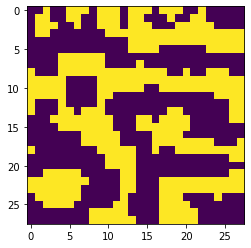

In [302]:
# Get the input label of the image.
label_02 = tf.one_hot(1, prediction2.shape[-1])
label_02 = tf.reshape(label_02, (1, prediction2.shape[-1]))

perturbations = create_adversarial_pattern(img1, label_02, mnist_model)
# test_labels[0]
plt.imshow(perturbations[0] * 0.05 + 0.05);  # To change [-1, 1] to [0,1]

In [319]:
def display_images(image, description):
    prediction = mnist_model.predict(image)
    prediction = prediction[0]
    acc = 100*np.max(prediction)
    label = np.argmax(mnist_model.predict(image)[0])
    
    plt.figure()
    plt.imshow(image[0]*0.5+0.5)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, acc))
    plt.show()

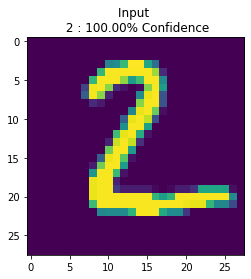

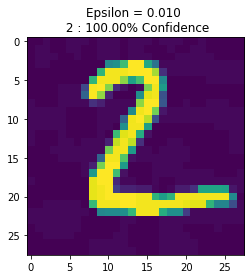

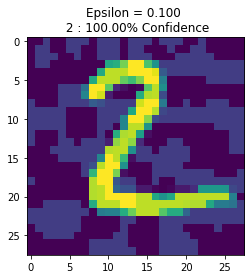

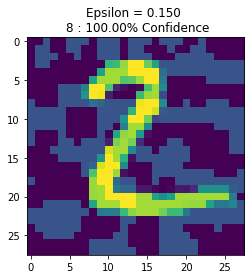

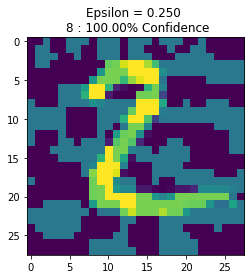

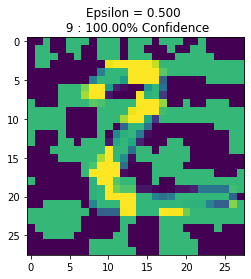

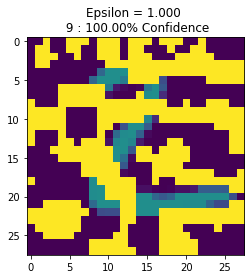

In [322]:
epsilons = [0, 0.01, 0.1, 0.15, 0.25, 0.5, 1]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
    adv_x = img1 + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    image_index = 
    display_images(adv_x, descriptions[i], )


# creating adversarial example with [7]

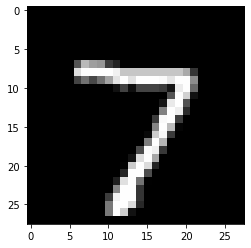

In [337]:
img_07 = test_images[0]
img_07 = (np.expand_dims(img_07,0))
img_07.shape
img_07 = tf.convert_to_tensor(img_07, dtype=tf.float32)
img_07
plt.imshow(test_images[0],cmap='gray')

In [338]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label, model):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)
        print(loss)

  # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad


tf.Tensor(22.880232, shape=(), dtype=float32)


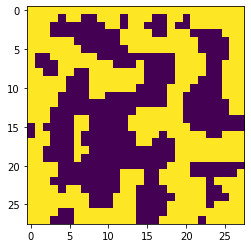

In [339]:
# Get the input label of the image.
prediction_07 = mnist_model.predict(img_07)
prediction_07
label_07 = tf.one_hot(0, prediction_07.shape[-1])
label_07 = tf.reshape(label_07, (1, prediction_07.shape[-1]))

perturbations = create_adversarial_pattern(img_07, label_07, mnist_model)
# test_labels[0]
plt.imshow(perturbations[0] * 0.05 + 0.05);  # To change [-1, 1] to [0,1]

In [352]:
def display_images(image, description, image_index):
    prediction = mnist_model.predict(image)
    prediction = prediction[0]
    acc = 100*np.max(prediction)
    label = np.argmax(mnist_model.predict(image)[0])
    plt.figure()
    plt.imshow(image[0]*0.5+0.5)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   pred_argmax, pre))
    plt.show()

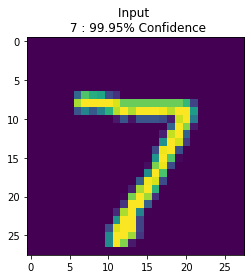

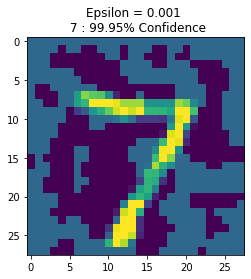

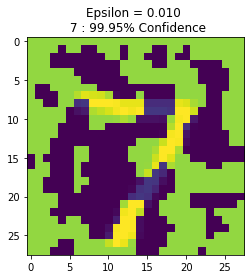

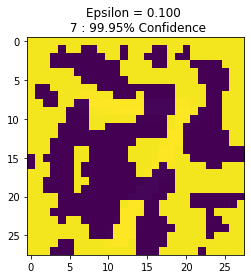

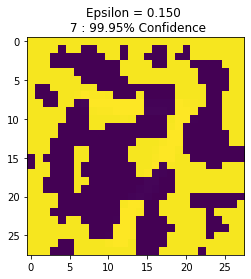

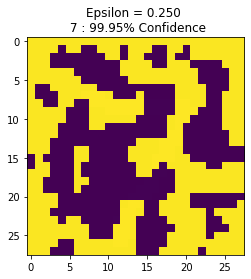

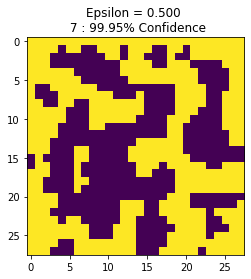

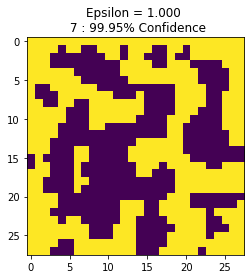

In [353]:
epsilons = [0, 0.001, 0.01, 0.1, 0.15, 0.25, 0.5, 1]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
    adv_x = img_07 + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    image_index = 0
    display_images(adv_x, descriptions[i], image_index)


# Previous Material

# Random Noise: poisson

In [111]:
from skimage.util import random_noise

# train_images_noisy= random_noise(train_images, mode='s&p',amount=0.01)
# test_images_noisy = random_noise(test_images, mode='s&p',amount=0.01)
train_images_poisson = random_noise(train_images,'poisson',100);

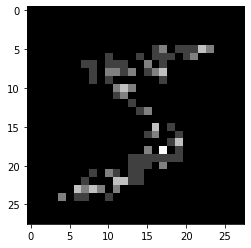

In [112]:
plt.imshow(train_images_poisson[0],cmap='gray')

# Random Noise: salt and pepper

In [113]:
train_images_sp120 = random_noise(train_images,'s&p',120);

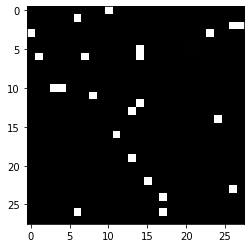

In [114]:
plt.imshow(train_images_sp120[0],cmap='gray')

# Random Noise: gaussian

In [115]:
train_images_gaussian = random_noise(train_images,'gaussian', 1);
# test_images_noise = random_noise(test_images_new,'poisson',1000);

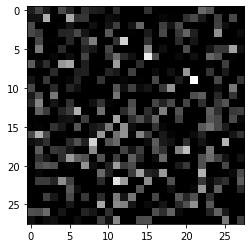

In [116]:
plt.imshow(train_images_gaussian[0],cmap='gray')

## Random Attack: noise with 0.5, Test accuracy: 0.10270000249147415

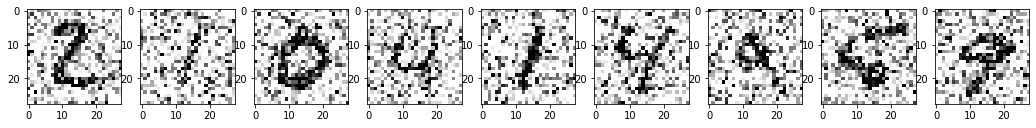

In [120]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize it to 0-1
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

#adding some noise
noise_factor = 0.5
#ramdom noise from normal distribution with mean at 0 and std dev of 1
train_images_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape) 
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape) 
#Clip all values to 0-1 [to stretch it]
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
plt.show()





In [121]:
mnist_model_05 = Sequential()
mnist_model_05.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
mnist_model_05.add(MaxPooling2D((2, 2),padding='same'))
mnist_model_05.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model_05.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model_05.add(Flatten())
mnist_model_05.add(Dense(128, activation='linear'))
mnist_model_05.add(Dense(num_classes, activation='softmax'))

# mnist_model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
mnist_model_05.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

mnist_model_05.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [122]:
# mnist_model_05.fit(train_images_noisy, test_images, epochs=10, batch_size=batch_size, 
#           validation_data=(x_test_noisy, label2))

mnist_model_05.fit(train_images_noisy, train_labels, epochs=10, verbose=1,
                   validation_data=(test_images_noisy, test_labels), batch_size=128)
# mnist_train = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
#                               validation_data=(valid_X, valid_label))

Epoch 1/10
469/469 [==============================] - 35s 72ms/step - loss: 27.3045 - accuracy: 0.1018 - val_loss: 27.2503 - val_accuracy: 0.1030
Epoch 2/10
469/469 [==============================] - 34s 72ms/step - loss: 27.3045 - accuracy: 0.1001 - val_loss: 27.2503 - val_accuracy: 0.0999
Epoch 3/10
469/469 [==============================] - 33s 70ms/step - loss: 27.3045 - accuracy: 0.1006 - val_loss: 27.2503 - val_accuracy: 0.1007
Epoch 4/10
469/469 [==============================] - 27s 58ms/step - loss: 27.3045 - accuracy: 0.1008 - val_loss: 27.2503 - val_accuracy: 0.0995
Epoch 5/10
469/469 [==============================] - 29s 61ms/step - loss: 27.3044 - accuracy: 0.1007 - val_loss: 27.2503 - val_accuracy: 0.1019
Epoch 6/10
469/469 [==============================] - 31s 66ms/step - loss: 27.3045 - accuracy: 0.0985 - val_loss: 27.2503 - val_accuracy: 0.0986
Epoch 7/10
469/469 [==============================] - 28s 59ms/step - loss: 27.3045 - accuracy: 0.0989 - val_loss: 27.2503 -

In [158]:
mnist_model_05.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_05.predict(test_images_noisy)

313/313 [==============================] - 1s 4ms/step - loss: 27.2503 - accuracy: 0.1001


313/313 [==============================] - 1s 5ms/step - loss: 27.2503 - accuracy: 0.1001


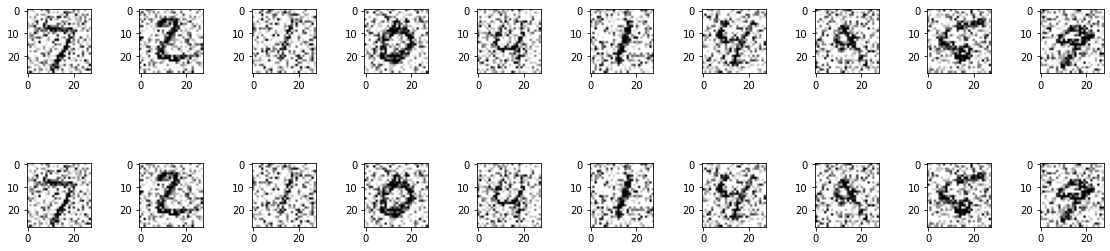

In [123]:

mnist_model_05.evaluate(test_images_noisy,  test_labels)
no_noise_img = mnist_model_05.predict(test_images_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image no_noise_img
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28), cmap="binary") 

plt.show()

In [124]:
test_eval = mnist_model_05.evaluate(test_images_noisy,  test_labels, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 27.25031280517578
Test accuracy: 0.10010000318288803
